In [1]:
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
import seaborn as sns
import os
from PIL import Image

In [2]:
train_dir = 'dataset_new/train'
val_dir = 'dataset_new/test'

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.


In [4]:
num_train = len(train_generator.classes) #4846
batch_size = 64
num_val = len(validation_generator.classes) #218

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
MaxPooling2D(pool_size=(2,2)),

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

C:\Users\yasas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
            train_generator,
            steps_per_epoch=num_train // batch_size,
            epochs=150,
            validation_data=validation_generator,
            validation_steps=num_val // batch_size)

Epoch 1/150


C:\Users\yasas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 18s 646ms/step - accuracy: 0.6031 - loss: 0.6906 - val_accuracy: 0.9531 - val_loss: 0.1398
Epoch 2/150
 1/19 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.8889 - loss: 0.3052

C:\Users\yasas\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8889 - loss: 0.3052 - val_accuracy: 0.8462 - val_loss: 0.3341
Epoch 3/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.9139 - loss: 0.2239 - val_accuracy: 0.9531 - val_loss: 0.1762
Epoch 4/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.1572 - val_accuracy: 0.8846 - val_loss: 0.1810
Epoch 5/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 223ms/step - accuracy: 0.9422 - loss: 0.1698 - val_accuracy: 0.9375 - val_loss: 0.1692
Epoch 6/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9531 - loss: 0.1583 - val_accuracy: 0.9615 - val_loss: 0.2050
Epoch 7/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 218ms/step - accuracy: 0.9575 - loss: 0.1280 - val_accuracy: 0.9479 - val_loss: 0.1569
Epoch 8/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9844 - loss: 0.0686 - val_accuracy: 0.9231 - val_loss: 0.1281
Epoch 9/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 231ms/step - accuracy: 0.9590 - loss: 0.1440 - val_accuracy: 0.9635 - val_

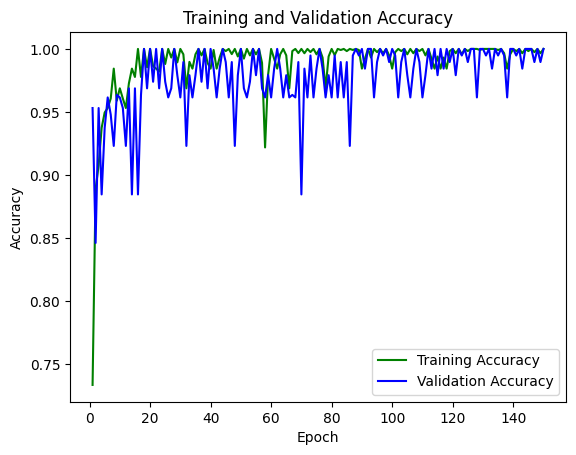

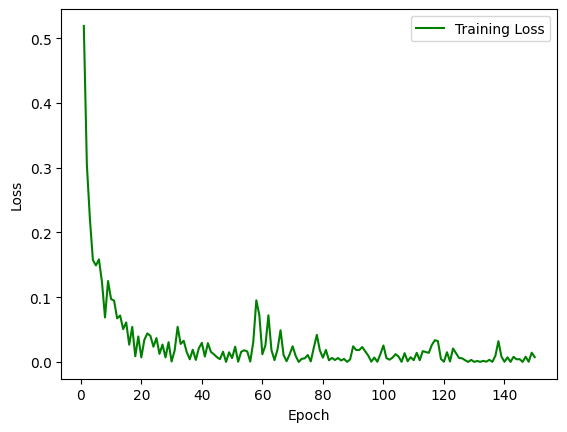

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, 151)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [9]:
tes_d ='TestSet'
test_data = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_gen = test_data.flow_from_directory(
        tes_d,
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 4232 images belonging to 2 classes.


In [10]:
model.evaluate(test_gen)

67/67 ━━━━━━━━━━━━━━━━━━━━ 45s 671ms/step - accuracy: 0.5921 - loss: 7.3086


[7.386147499084473, 0.5879017114639282]

In [11]:
model.save('driver_model_eye.h5', overwrite=True)